In [36]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from datetime import datetime
from matplotlib.pylab import rcParams
rcParams["figure.figsize"]=10,6
import warnings
warnings.filterwarnings("ignore")

In [37]:
df=pd.read_excel(r"C:\Users\delll\Desktop\Python\DataSets\Datasets_Forecasting\Airlines-Data.xlsx")
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [38]:
df["Month"]=pd.to_datetime(df["Month"],infer_datetime_format=True)
df1=df.set_index(["Month"])
df1.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


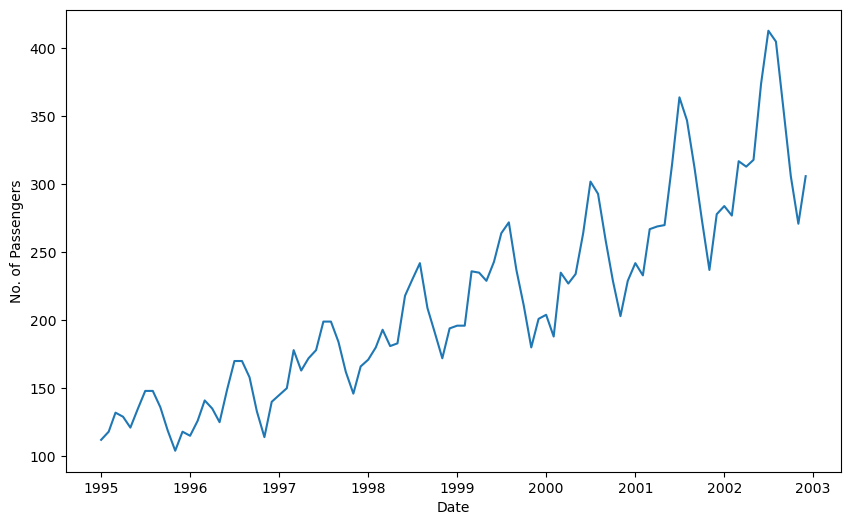

In [39]:
## Plot graph
plt.plot(df1)
plt.xlabel("Date")
plt.ylabel("No. of Passengers")
plt.show()
# from graph we can say that as the year passing the no of passengers are increasing
# this the uptread in time series.

In [40]:
# Determining rolling statistics
rolmean=df1.rolling(window=12).mean()
rolstd=df1.rolling(window=12).std()
print(rolmean)
print("-"*50)
print(rolstd)

            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01  316.833333
2002-09-01  320.416667
2002-10-01  323.083333
2002-11-01  325.916667
2002-12-01  328.250000

[96 rows x 1 columns]
--------------------------------------------------
            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01   54.530781
2002-09-01   55.586883
2002-10-01   53.899668
2002-11-01   49.692616
2002-12-01   47.861780

[96 rows x 1 columns]


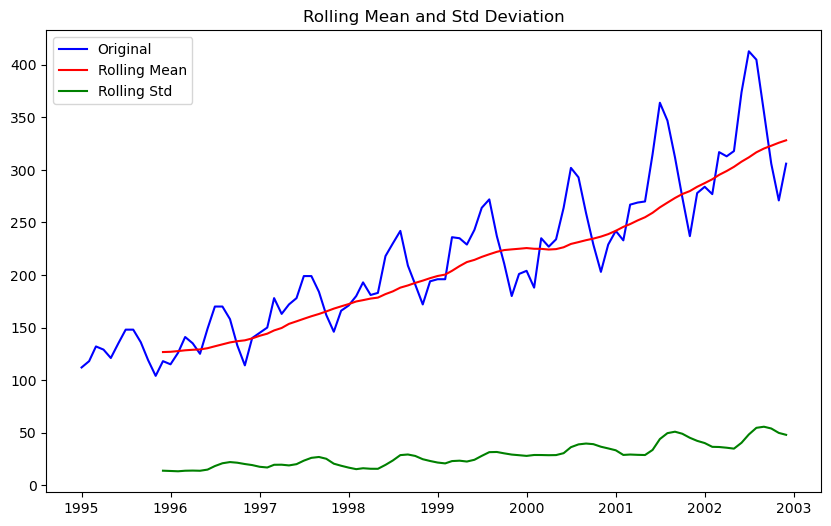

In [41]:
## plot rolling statistics
plt.plot(df1,color="blue",label="Original")
plt.plot(rolmean,color="red",label="Rolling Mean")
plt.plot(rolstd,color="green",label="Rolling Std")
plt.legend()
plt.title("Rolling Mean and Std Deviation")
plt.show()

In [42]:
# perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
dftest=adfuller(df1["Passengers"],autolag="AIC")
dftest[4]

{'1%': -3.5117123057187376,
 '5%': -2.8970475206326833,
 '10%': -2.5857126912469153}

In [43]:
dfoutput=pd.Series(dftest[0:4],index=["Test Statistics","p-value","lags used","No.of observation used"])

In [44]:
for i,j in dftest[4].items():
    dfoutput["Critical value(%s)"%i]=j

In [45]:
print(dfoutput)

Test Statistics            1.340248
p-value                    0.996825
lags used                 12.000000
No.of observation used    83.000000
Critical value(1%)        -3.511712
Critical value(5%)        -2.897048
Critical value(10%)       -2.585713
dtype: float64


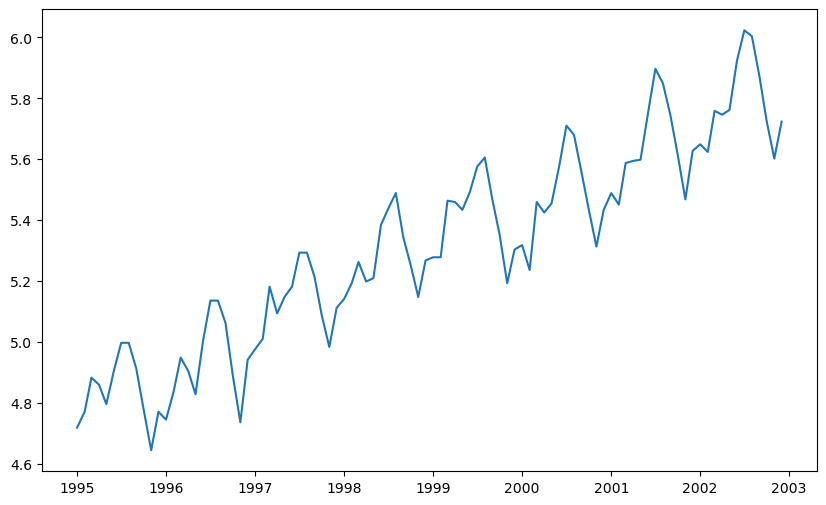

In [46]:
# Estimating the trend
df1_log=np.log(df1)
plt.plot(df1_log)

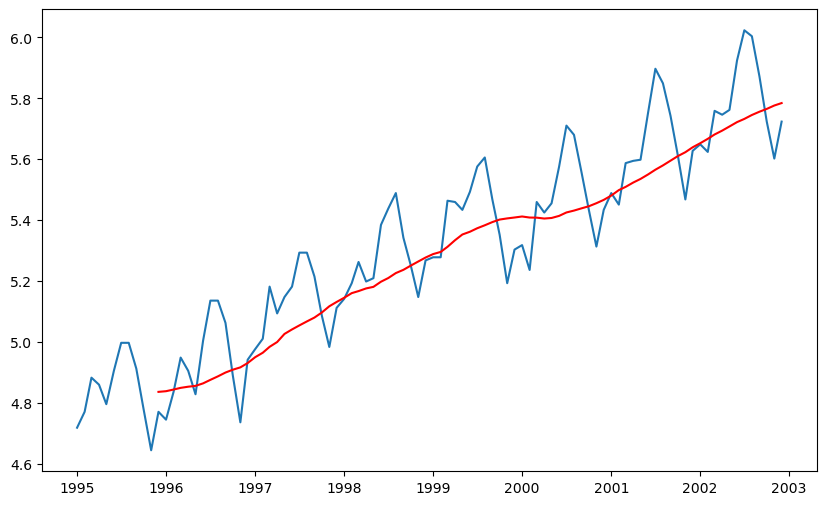

In [47]:
movingmean=df1_log.rolling(window=12).mean()
movingstd=df1_log.rolling(window=12).std()
plt.plot(df1_log)
plt.plot(movingmean,color="red")
plt.show()

In [51]:
df1_avg=df1_log-movingmean
df1_avg.head(20)

# remove nan values
df1_avg.dropna(inplace=True)
df1_avg.head(12)

,Passengers
Month,
1995-12-01,-0.065494
1996-01-01,-0.093449
1996-02-01,-0.007566
1996-03-01,0.099416
1996-04-01,0.052142
1996-05-01,-0.027529
1996-06-01,0.139881
1996-07-01,0.260184
1996-08-01,0.248635


In [53]:
movingmean=df1_avg.rolling(window=12).mean()
movingstd=df1_avg.rolling(window=12).std()

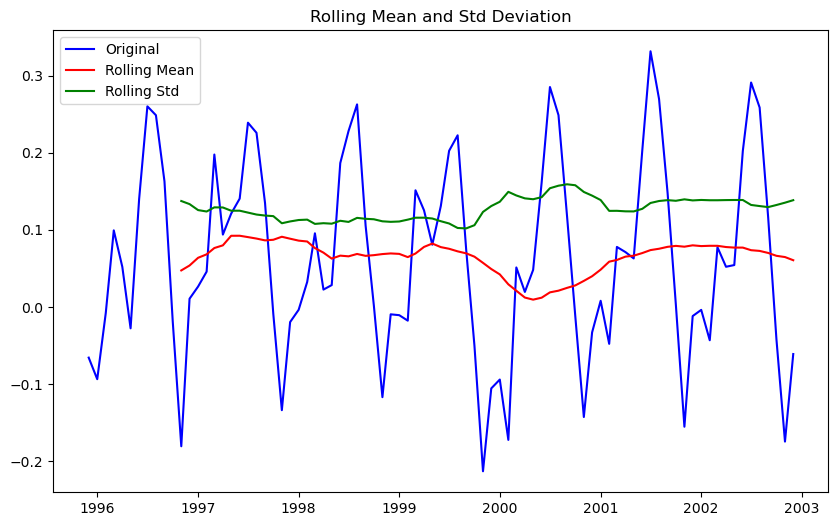

In [54]:
## plot rolling statistics
plt.plot(df1_avg,color="blue",label="Original")
plt.plot(movingmean,color="red",label="Rolling Mean")
plt.plot(movingstd,color="green",label="Rolling Std")
plt.legend()
plt.title("Rolling Mean and Std Deviation")
plt.show()